In [16]:
# Imports and constants
import os
import boto3
import math
import random
import json

from botocore.exceptions import NoCredentialsError

# S3 data constants
S3_BUCKET = "ml-competition-data"
COMPETITION_S3_PATH = "google-research-contrails/"
TRAIN_DATA_S3_PATH = "google-research-contrails/train/"
TRAIN_DATA_DISK_PATH = "../data/train"
TRAIN_METADATA = "train_metadata.json"
DATA_DISK_PATH = "../data"

# Set random seed
R_SEED = 808
random.seed(R_SEED)

s3 = boto3.client("s3")
paginator = s3.get_paginator("list_objects")

In [6]:
# Load training data


def load_train_data(bucket, s3_path, local_path, percent=1):
    # TODO: Load the train_metadata.json file from root competition data s3 path
    #       Change to use s3 paginator to look through all training data in s3 bucket
    try:
        all_subdirs = []
        page_iterator = paginator.paginate(Bucket=bucket, Delimiter="/", Prefix=s3_path)
        for page in page_iterator:
            for sub_dir in page.get("CommonPrefixes"):
                all_subdirs.append(sub_dir["Prefix"])

        print(f"Fetched list of {len(all_subdirs)} available training data")

        num_to_load = math.ceil(len(all_subdirs) * percent / 100)
        print(
            f"Loading random selection of {num_to_load} training data points froms s3"
        )

        for subdir in random.sample(all_subdirs, num_to_load):
            for obj in s3.list_objects(Bucket=bucket, Prefix=subdir)["Contents"]:
                # Strip s3_path from filenames
                local_filename = os.path.join(local_path, obj["Key"]).replace(
                    s3_path, ""
                )
                print(local_filename)
                if not os.path.exists(os.path.dirname(local_filename)):
                    os.makedirs(os.path.dirname(local_filename))
                s3.download_file(bucket, obj["Key"], local_filename)

    except NoCredentialsError:
        print("No AWS credentials found")


if not os.listdir(TRAIN_DATA_DISK_PATH):
    print("Loading batch of training data...")
    load_train_data(S3_BUCKET, TRAIN_DATA_S3_PATH, TRAIN_DATA_DISK_PATH)
else:
    print("A batch of training data already exists")

Loading batch of training data...
Fetched list of 20529 available training data
Loading randing selection of 206 training data points froms s3
../data/train/5836499336941636180/band_08.npy
../data/train/5836499336941636180/band_09.npy
../data/train/5836499336941636180/band_10.npy
../data/train/5836499336941636180/band_11.npy
../data/train/5836499336941636180/band_12.npy
../data/train/5836499336941636180/band_13.npy
../data/train/5836499336941636180/band_14.npy
../data/train/5836499336941636180/band_15.npy
../data/train/5836499336941636180/band_16.npy
../data/train/5836499336941636180/human_individual_masks.npy
../data/train/5836499336941636180/human_pixel_masks.npy
../data/train/6980875053042738162/band_08.npy
../data/train/6980875053042738162/band_09.npy
../data/train/6980875053042738162/band_10.npy
../data/train/6980875053042738162/band_11.npy
../data/train/6980875053042738162/band_12.npy
../data/train/6980875053042738162/band_13.npy
../data/train/6980875053042738162/band_14.npy
../d

../data/train/5680087506434881428/band_10.npy
../data/train/5680087506434881428/band_11.npy
../data/train/5680087506434881428/band_12.npy
../data/train/5680087506434881428/band_13.npy
../data/train/5680087506434881428/band_14.npy
../data/train/5680087506434881428/band_15.npy
../data/train/5680087506434881428/band_16.npy
../data/train/5680087506434881428/human_individual_masks.npy
../data/train/5680087506434881428/human_pixel_masks.npy
../data/train/1569401126378072560/band_08.npy
../data/train/1569401126378072560/band_09.npy
../data/train/1569401126378072560/band_10.npy
../data/train/1569401126378072560/band_11.npy
../data/train/1569401126378072560/band_12.npy
../data/train/1569401126378072560/band_13.npy
../data/train/1569401126378072560/band_14.npy
../data/train/1569401126378072560/band_15.npy
../data/train/1569401126378072560/band_16.npy
../data/train/1569401126378072560/human_individual_masks.npy
../data/train/1569401126378072560/human_pixel_masks.npy
../data/train/8674226198117707

../data/train/8330469771557141853/band_16.npy
../data/train/8330469771557141853/human_individual_masks.npy
../data/train/8330469771557141853/human_pixel_masks.npy
../data/train/3218259825010582940/band_08.npy
../data/train/3218259825010582940/band_09.npy
../data/train/3218259825010582940/band_10.npy
../data/train/3218259825010582940/band_11.npy
../data/train/3218259825010582940/band_12.npy
../data/train/3218259825010582940/band_13.npy
../data/train/3218259825010582940/band_14.npy
../data/train/3218259825010582940/band_15.npy
../data/train/3218259825010582940/band_16.npy
../data/train/3218259825010582940/human_individual_masks.npy
../data/train/3218259825010582940/human_pixel_masks.npy
../data/train/9097626090044199871/band_08.npy
../data/train/9097626090044199871/band_09.npy
../data/train/9097626090044199871/band_10.npy
../data/train/9097626090044199871/band_11.npy
../data/train/9097626090044199871/band_12.npy
../data/train/9097626090044199871/band_13.npy
../data/train/9097626090044199

../data/train/3240519298852108453/band_10.npy
../data/train/3240519298852108453/band_11.npy
../data/train/3240519298852108453/band_12.npy
../data/train/3240519298852108453/band_13.npy
../data/train/3240519298852108453/band_14.npy
../data/train/3240519298852108453/band_15.npy
../data/train/3240519298852108453/band_16.npy
../data/train/3240519298852108453/human_individual_masks.npy
../data/train/3240519298852108453/human_pixel_masks.npy
../data/train/7807309590349523766/band_08.npy
../data/train/7807309590349523766/band_09.npy
../data/train/7807309590349523766/band_10.npy
../data/train/7807309590349523766/band_11.npy
../data/train/7807309590349523766/band_12.npy
../data/train/7807309590349523766/band_13.npy
../data/train/7807309590349523766/band_14.npy
../data/train/7807309590349523766/band_15.npy
../data/train/7807309590349523766/band_16.npy
../data/train/7807309590349523766/human_individual_masks.npy
../data/train/7807309590349523766/human_pixel_masks.npy
../data/train/5354296379513023

../data/train/5523632762993795252/band_16.npy
../data/train/5523632762993795252/human_individual_masks.npy
../data/train/5523632762993795252/human_pixel_masks.npy
../data/train/8513593766700900085/band_08.npy
../data/train/8513593766700900085/band_09.npy
../data/train/8513593766700900085/band_10.npy
../data/train/8513593766700900085/band_11.npy
../data/train/8513593766700900085/band_12.npy
../data/train/8513593766700900085/band_13.npy
../data/train/8513593766700900085/band_14.npy
../data/train/8513593766700900085/band_15.npy
../data/train/8513593766700900085/band_16.npy
../data/train/8513593766700900085/human_individual_masks.npy
../data/train/8513593766700900085/human_pixel_masks.npy
../data/train/1080927557949714876/band_08.npy
../data/train/1080927557949714876/band_09.npy
../data/train/1080927557949714876/band_10.npy
../data/train/1080927557949714876/band_11.npy
../data/train/1080927557949714876/band_12.npy
../data/train/1080927557949714876/band_13.npy
../data/train/1080927557949714

../data/train/8953342799022887486/band_10.npy
../data/train/8953342799022887486/band_11.npy
../data/train/8953342799022887486/band_12.npy
../data/train/8953342799022887486/band_13.npy
../data/train/8953342799022887486/band_14.npy
../data/train/8953342799022887486/band_15.npy
../data/train/8953342799022887486/band_16.npy
../data/train/8953342799022887486/human_individual_masks.npy
../data/train/8953342799022887486/human_pixel_masks.npy
../data/train/5461387023392509522/band_08.npy
../data/train/5461387023392509522/band_09.npy
../data/train/5461387023392509522/band_10.npy
../data/train/5461387023392509522/band_11.npy
../data/train/5461387023392509522/band_12.npy
../data/train/5461387023392509522/band_13.npy
../data/train/5461387023392509522/band_14.npy
../data/train/5461387023392509522/band_15.npy
../data/train/5461387023392509522/band_16.npy
../data/train/5461387023392509522/human_individual_masks.npy
../data/train/5461387023392509522/human_pixel_masks.npy
../data/train/4002255688547865

../data/train/8488793380291902877/band_16.npy
../data/train/8488793380291902877/human_individual_masks.npy
../data/train/8488793380291902877/human_pixel_masks.npy
../data/train/5743619166308382658/band_08.npy
../data/train/5743619166308382658/band_09.npy
../data/train/5743619166308382658/band_10.npy
../data/train/5743619166308382658/band_11.npy
../data/train/5743619166308382658/band_12.npy
../data/train/5743619166308382658/band_13.npy
../data/train/5743619166308382658/band_14.npy
../data/train/5743619166308382658/band_15.npy
../data/train/5743619166308382658/band_16.npy
../data/train/5743619166308382658/human_individual_masks.npy
../data/train/5743619166308382658/human_pixel_masks.npy
../data/train/6487849543740860057/band_08.npy
../data/train/6487849543740860057/band_09.npy
../data/train/6487849543740860057/band_10.npy
../data/train/6487849543740860057/band_11.npy
../data/train/6487849543740860057/band_12.npy
../data/train/6487849543740860057/band_13.npy
../data/train/6487849543740860

../data/train/5746494790600270132/band_10.npy
../data/train/5746494790600270132/band_11.npy
../data/train/5746494790600270132/band_12.npy
../data/train/5746494790600270132/band_13.npy
../data/train/5746494790600270132/band_14.npy
../data/train/5746494790600270132/band_15.npy
../data/train/5746494790600270132/band_16.npy
../data/train/5746494790600270132/human_individual_masks.npy
../data/train/5746494790600270132/human_pixel_masks.npy
../data/train/2771751863477091048/band_08.npy
../data/train/2771751863477091048/band_09.npy
../data/train/2771751863477091048/band_10.npy
../data/train/2771751863477091048/band_11.npy
../data/train/2771751863477091048/band_12.npy
../data/train/2771751863477091048/band_13.npy
../data/train/2771751863477091048/band_14.npy
../data/train/2771751863477091048/band_15.npy
../data/train/2771751863477091048/band_16.npy
../data/train/2771751863477091048/human_individual_masks.npy
../data/train/2771751863477091048/human_pixel_masks.npy
../data/train/4281530218709087

../data/train/6980836178317632694/band_16.npy
../data/train/6980836178317632694/human_individual_masks.npy
../data/train/6980836178317632694/human_pixel_masks.npy
../data/train/3395530361561866296/band_08.npy
../data/train/3395530361561866296/band_09.npy
../data/train/3395530361561866296/band_10.npy
../data/train/3395530361561866296/band_11.npy
../data/train/3395530361561866296/band_12.npy
../data/train/3395530361561866296/band_13.npy
../data/train/3395530361561866296/band_14.npy
../data/train/3395530361561866296/band_15.npy
../data/train/3395530361561866296/band_16.npy
../data/train/3395530361561866296/human_individual_masks.npy
../data/train/3395530361561866296/human_pixel_masks.npy
../data/train/9181852070856309468/band_08.npy
../data/train/9181852070856309468/band_09.npy
../data/train/9181852070856309468/band_10.npy
../data/train/9181852070856309468/band_11.npy
../data/train/9181852070856309468/band_12.npy
../data/train/9181852070856309468/band_13.npy
../data/train/9181852070856309

../data/train/7716286135653158731/band_11.npy
../data/train/7716286135653158731/band_12.npy
../data/train/7716286135653158731/band_13.npy
../data/train/7716286135653158731/band_14.npy
../data/train/7716286135653158731/band_15.npy
../data/train/7716286135653158731/band_16.npy
../data/train/7716286135653158731/human_individual_masks.npy
../data/train/7716286135653158731/human_pixel_masks.npy
../data/train/7798404499124932441/band_08.npy
../data/train/7798404499124932441/band_09.npy
../data/train/7798404499124932441/band_10.npy
../data/train/7798404499124932441/band_11.npy
../data/train/7798404499124932441/band_12.npy
../data/train/7798404499124932441/band_13.npy
../data/train/7798404499124932441/band_14.npy
../data/train/7798404499124932441/band_15.npy
../data/train/7798404499124932441/band_16.npy
../data/train/7798404499124932441/human_individual_masks.npy
../data/train/7798404499124932441/human_pixel_masks.npy
../data/train/387268064258113669/band_08.npy
../data/train/38726806425811366

../data/train/4493966103841276783/human_pixel_masks.npy
../data/train/6489294349562524958/band_08.npy
../data/train/6489294349562524958/band_09.npy
../data/train/6489294349562524958/band_10.npy
../data/train/6489294349562524958/band_11.npy
../data/train/6489294349562524958/band_12.npy
../data/train/6489294349562524958/band_13.npy
../data/train/6489294349562524958/band_14.npy
../data/train/6489294349562524958/band_15.npy
../data/train/6489294349562524958/band_16.npy
../data/train/6489294349562524958/human_individual_masks.npy
../data/train/6489294349562524958/human_pixel_masks.npy
../data/train/6374801567845363776/band_08.npy
../data/train/6374801567845363776/band_09.npy
../data/train/6374801567845363776/band_10.npy
../data/train/6374801567845363776/band_11.npy
../data/train/6374801567845363776/band_12.npy
../data/train/6374801567845363776/band_13.npy
../data/train/6374801567845363776/band_14.npy
../data/train/6374801567845363776/band_15.npy
../data/train/6374801567845363776/band_16.npy

../data/train/6406378203462680923/band_14.npy
../data/train/6406378203462680923/band_15.npy
../data/train/6406378203462680923/band_16.npy
../data/train/6406378203462680923/human_individual_masks.npy
../data/train/6406378203462680923/human_pixel_masks.npy
../data/train/7541733287616021347/band_08.npy
../data/train/7541733287616021347/band_09.npy
../data/train/7541733287616021347/band_10.npy
../data/train/7541733287616021347/band_11.npy
../data/train/7541733287616021347/band_12.npy
../data/train/7541733287616021347/band_13.npy
../data/train/7541733287616021347/band_14.npy
../data/train/7541733287616021347/band_15.npy
../data/train/7541733287616021347/band_16.npy
../data/train/7541733287616021347/human_individual_masks.npy
../data/train/7541733287616021347/human_pixel_masks.npy
../data/train/1433735035157082281/band_08.npy
../data/train/1433735035157082281/band_09.npy
../data/train/1433735035157082281/band_10.npy
../data/train/1433735035157082281/band_11.npy
../data/train/1433735035157082

../data/train/1867693291168786391/band_08.npy
../data/train/1867693291168786391/band_09.npy
../data/train/1867693291168786391/band_10.npy
../data/train/1867693291168786391/band_11.npy
../data/train/1867693291168786391/band_12.npy
../data/train/1867693291168786391/band_13.npy
../data/train/1867693291168786391/band_14.npy
../data/train/1867693291168786391/band_15.npy
../data/train/1867693291168786391/band_16.npy
../data/train/1867693291168786391/human_individual_masks.npy
../data/train/1867693291168786391/human_pixel_masks.npy
../data/train/4747604908830153668/band_08.npy
../data/train/4747604908830153668/band_09.npy
../data/train/4747604908830153668/band_10.npy
../data/train/4747604908830153668/band_11.npy
../data/train/4747604908830153668/band_12.npy
../data/train/4747604908830153668/band_13.npy
../data/train/4747604908830153668/band_14.npy
../data/train/4747604908830153668/band_15.npy
../data/train/4747604908830153668/band_16.npy
../data/train/4747604908830153668/human_individual_mask

../data/train/6086275922603337968/band_14.npy
../data/train/6086275922603337968/band_15.npy
../data/train/6086275922603337968/band_16.npy
../data/train/6086275922603337968/human_individual_masks.npy
../data/train/6086275922603337968/human_pixel_masks.npy
../data/train/3307873037997266820/band_08.npy
../data/train/3307873037997266820/band_09.npy
../data/train/3307873037997266820/band_10.npy
../data/train/3307873037997266820/band_11.npy
../data/train/3307873037997266820/band_12.npy
../data/train/3307873037997266820/band_13.npy
../data/train/3307873037997266820/band_14.npy
../data/train/3307873037997266820/band_15.npy
../data/train/3307873037997266820/band_16.npy
../data/train/3307873037997266820/human_individual_masks.npy
../data/train/3307873037997266820/human_pixel_masks.npy
../data/train/226145707528896325/band_08.npy
../data/train/226145707528896325/band_09.npy
../data/train/226145707528896325/band_10.npy
../data/train/226145707528896325/band_11.npy
../data/train/226145707528896325/b

In [23]:
# Load training metadata


def load_train_metadata(bucket, s3_path, local_path):
    key = f"{COMPETITION_S3_PATH}{TRAIN_METADATA}"
    print(f"Loading train metadata from {key}")
    s3.download_file(bucket, key, local_path)


train_metadata_path = f"{DATA_DISK_PATH}/{TRAIN_METADATA}"
if not os.path.exists(train_metadata_path):
    load_train_metadata(S3_BUCKET, COMPETITION_S3_PATH, train_metadata_path)

print(f"Reading metadata from {train_metadata_path}")
with open(train_metadata_path, "r") as metadata_file:
    train_metadata = json.load(metadata_file)
print(f"Loaded metadata file with {len(train_metadata)} entries. Example:")
print(train_metadata[0])

Reading metadata from ../data/train_metadata.json
Loaded metadata file with 20529 entries. Example:
{'record_id': '3283699311323360356', 'projection_wkt': 'PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-51],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]', 'row_min': 1686563.5, 'row_size': -1960.975830078125, 'col_min': 371650.9375, 'col_size': 1947.1307373046875, 'timestamp': 1571008800.0}


# Composition of training data

Each data point resides in a directory named by its {record_id}. 
The directory holds .npy files called band_{08-16}. Each is a H x W x T array, 
where T = n_times_before + n_times_after + 1 number of images in the temporal sequence. 
Here n_times_before = 4 and n_times_after=3. 
Each band is an infared channel at different wavelengths, converted to brightness
temperatures. The number in the filename = GOES-16 ABI band number

Also present are files called human_individual_masks.npy and human_pixel_masks.npy:
    - human_invidiual_masks: array of size H x W x 1 x R
        Each example is labeled by R human labelers, where R differs per sample.
        They have value either 0 and 1, labeling the (n_times_before + 1)th image, the 
        "current" time
            This is the "raw" data
    - human_pixel_masks: array with size H x W x 1, the binary ground truth
        A pixel is a contrail pixel if it is labeled as contrail by more than
        half of the labelers
            This is the interpreted "raw" data, our real labels
            
The metadata json files contain the timestamps and projection parameters to reproduce the satellite images

Summary:
- Our input data is a time series of 8 sattelite images of the same location
- The frame of interest is at index 4. We have 4 images _before_ this frame, and 3 after
- Each frame is broken down into different _bands_, where each brand is a different infared channel
- The dependent variables are the pixel labels given by each human_pixel_masks.npy. 0 for not a contrail, 1 for part of a contrail

In [45]:
# Load and visualize training data

import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython import display

TRAIN_DATA_DISK_PATH
N_TIMES_BEFORE = 4
record_id = "5353514884902208288"

with open(os.path.join(TRAIN_DATA_DISK_PATH, record_id, "band_11.npy"), "rb") as f:
    band11 = np.load(f)
with open(os.path.join(TRAIN_DATA_DISK_PATH, record_id, "band_14.npy"), "rb") as f:
    band14 = np.load(f)
with open(os.path.join(TRAIN_DATA_DISK_PATH, record_id, "band_15.npy"), "rb") as f:
    band15 = np.load(f)

with open(
    os.path.join(TRAIN_DATA_DISK_PATH, record_id, "human_pixel_masks.npy"), "rb"
) as f:
    human_pixel_mask = np.load(f)
with open(
    os.path.join(TRAIN_DATA_DISK_PATH, record_id, "human_individual_masks.npy"), "rb"
) as f:
    human_individual_mask = np.load(f)

print(band11.shape)

(256, 256, 8)


In [46]:
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)


def normalize_range(data, bounds):
    """Maps data to the range [0,1]"""
    return (data - bounds[0]) / (bounds[1] - bounds[0])


r = normalize_range(band15 - band14, _TDIFF_BOUNDS)
g = normalize_range(band14 - band11, _CLOUD_TOP_TDIFF_BOUNDS)
b = normalize_range(band14, _T11_BOUNDS)
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
false_color
false_color.shape

(256, 256, 3, 8)

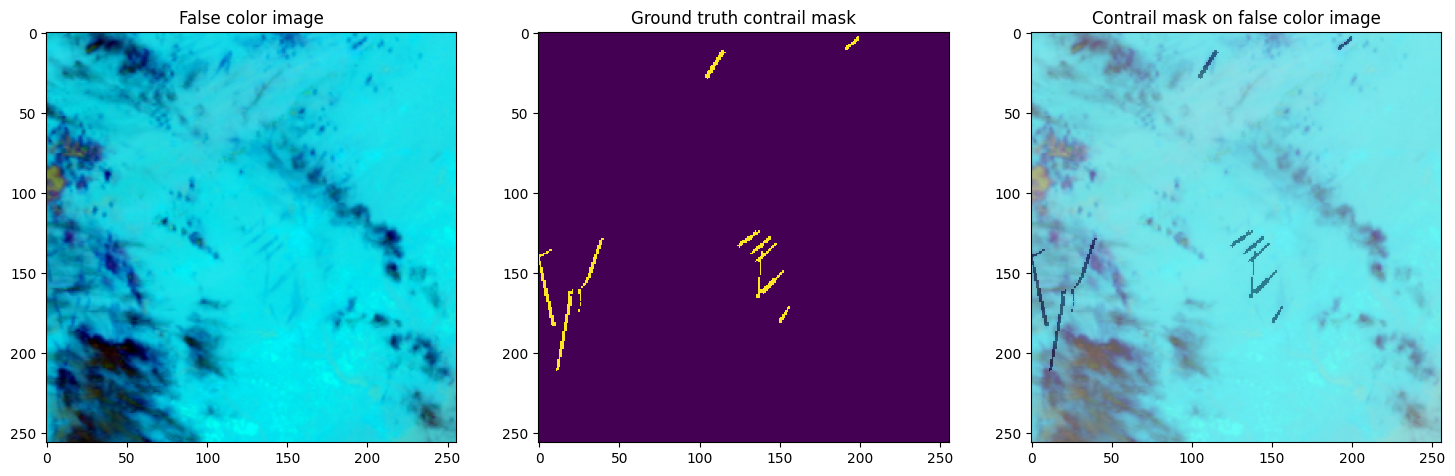

In [47]:
# Visualize data
img = false_color[..., N_TIMES_BEFORE]

plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title("False color image")

ax = plt.subplot(1, 3, 2)
ax.imshow(human_pixel_mask, interpolation="none")
ax.set_title("Ground truth contrail mask")

ax = plt.subplot(1, 3, 3)
ax.imshow(img)
ax.imshow(human_pixel_mask, cmap="Reds", alpha=0.4, interpolation="none")
ax.set_title("Contrail mask on false color image");

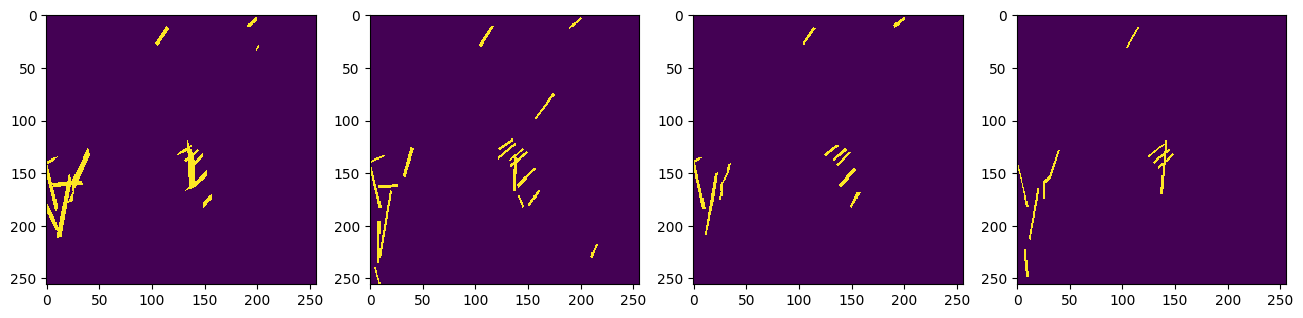

In [50]:
# Individual human masks

n = human_individual_mask.shape[-1]
plt.figure(figsize=(16, 4))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(human_individual_mask[..., i], interpolation="none")

In [53]:
# Time sequence animation

fig = plt.figure(figsize=(6, 6))
im = plt.imshow(false_color[..., 0])


def draw(i):
    im.set_array(false_color[..., i])
    return [im]


anim = animation.FuncAnimation(
    fig, draw, frames=false_color.shape[-1], interval=500, blit=True
)
plt.close()
display.HTML(anim.to_jshtml())

In [ ]:
# TODO: Determine a train vs validation data split
#       Train a simple baseline model

In [ ]:
# TODO: Practice making a submission with the run-length encoding format
#     https://www.kaggle.com/code/inversion/contrails-rle-submission